In [2]:
pip install yfinance

     |████████████████████████████████| 5.5 MB 4.6 MB/s eta 0:00:01
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=eff9a90b53f2a4add587edf02c419f7d6362bde63c3f1005f2ef54f026d45074
  Stored in directory: /home/ec2-user/.cache/pip/wheels/68/72/87/a384b8b8139f2489024464d6f5937e6acb2054c57d25519fb9
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=1ce7780e5fda2d0b37117b74ad1c2ac16c00990a70caafb7d2659ef1a9452b8a
  Stored in directory: /home/ec2-user/.cache/pip/wheels/5e/8a/c4/59c699498647c7c94b14c87a904ca7540646107b3d94b7c320
Successfully built yfinance multitasking
  Attempting uninstall: lxml
    Found existing installation: lxml 4.5.0
    Uninstalling lxml-4.5.0:
      Successfully uninstalled lxml-4.5.0
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p36/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import yfinance as yf
import features_helpers as fh

In [2]:
dir(fh)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'ascii_letters',
 'define_compressed_features_set_one',
 'define_data_group',
 'define_features_set_one',
 'define_features_set_two',
 'define_heat_map',
 'np',
 'pd',
 'plt',
 're',
 'scale_and_split',
 'sns',
 'split_and_standardize_data',
 'split_data',
 'split_data_for_period',
 'split_data_for_period_V2',
 'split_data_for_period_and_outsteps',
 'split_data_for_steps',
 'split_data_portion']

In [3]:
data = yf.download("AMD", start="2010-09-29", end="2020-09-29")

[*********************100%***********************]  1 of 1 completed


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,13.166106,13.444561,12.877080,13.169841,13.169841,4.071425e+07
std,15.854043,16.193626,15.483868,15.866651,15.866651,3.579938e+07
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,3.650000,3.710000,3.590000,3.650000,3.650000,1.526940e+07
50%,6.960000,7.080000,6.800000,6.960000,6.960000,2.924340e+07
75%,13.780000,14.050000,13.540000,13.810000,13.810000,5.441310e+07
max,94.010002,94.279999,90.190002,92.180000,92.180000,3.250584e+08


In [5]:
data = fh.define_features_set_two(data)

Date
2010-09-29   -0.17
2010-09-30   -0.17
2010-10-01   -0.06
2010-10-04   -0.11
2010-10-05    0.04
Name: Adj Close, dtype: float64
count    2517.000000
mean        0.028617
std         0.781913
min        -7.680000
25%        -0.110000
50%         0.000000
75%         0.120000
max         9.830002
Name: Adj Close, dtype: float64


In [6]:
data.describe()

,Adj Close,Volume,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,ROC,RSI
count,2517.000000,2.517000e+03,2511.000000,2497.000000,2517.000000,2517.000000,2517.000000,2498.000000,2497.000000,2497.000000,2517.000000,2507.000000,2517.000000
mean,13.169841,4.071425e+07,13.100209,12.934631,12.814380,13.014867,0.200487,0.772035,14.479193,11.390069,12.899571,0.016034,51.811041
std,15.866651,3.579938e+07,15.707139,15.319954,15.053168,15.520397,0.861549,1.180494,17.277746,13.491970,15.252319,0.114751,14.977326
min,1.620000,0.000000e+00,1.701429,1.792381,1.786735,1.745111,-2.717936,0.027415,1.904977,1.459299,1.770352,-0.389638,0.000000
25%,3.650000,1.526940e+07,3.650714,3.616667,3.655424,3.638503,-0.106013,0.177505,4.030972,3.217274,3.642578,-0.051312,41.410339
50%,6.960000,2.924340e+07,6.974286,6.892381,6.894359,6.958068,0.032777,0.357768,7.688317,6.046098,6.925028,0.012563,52.602851
75%,13.810000,5.441310e+07,13.784286,13.560000,13.358875,13.637732,0.269461,0.815067,14.927400,12.264015,13.446185,0.081133,62.230244
max,92.180000,3.250584e+08,87.848572,84.357618,81.482128,86.373815,8.053474,12.143351,93.978309,77.721870,83.520131,0.555970,91.367263


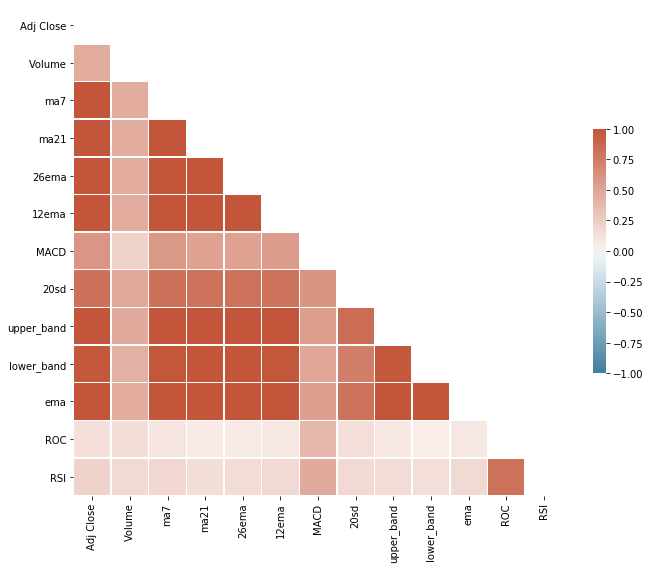

In [7]:
fh.define_heat_map(data)

Based on the heatmap, it seems we could ignore "Open", "Close", "High" and "Low" data. They are highly correlated to "Adj Close".  We cannot use "Volume" either as we cannot perdict one day to the next what would be the number of transactions.

In [8]:
#data_reduced = data.drop(columns=['Close','High','Low', 'Open', 'Volume'])
data_reduced = data
data_reduced.bfill(inplace=True)

In [9]:
data_reduced.describe()

,Adj Close,Volume,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,ROC,RSI
count,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,13.169841,4.071425e+07,13.085698,12.888035,12.814380,13.014867,0.200487,0.767395,14.422918,11.353151,12.899571,0.015937,51.811041
std,15.866651,3.579938e+07,15.691209,15.267826,15.053168,15.520397,0.861549,1.177231,17.220426,13.444571,15.252319,0.114533,14.977326
min,1.620000,0.000000e+00,1.701429,1.792381,1.786735,1.745111,-2.717936,0.027415,1.904977,1.459299,1.770352,-0.389638,0.000000
25%,3.650000,1.526940e+07,3.654286,3.629524,3.655424,3.638503,-0.106013,0.173159,4.035042,3.234322,3.642578,-0.050725,41.410339
50%,6.960000,2.924340e+07,6.980000,6.926667,6.894359,6.958068,0.032777,0.351906,7.642321,6.120113,6.925028,0.012346,52.602851
75%,13.810000,5.441310e+07,13.780000,13.535238,13.358875,13.637732,0.269461,0.809619,14.887121,12.220166,13.446185,0.081097,62.230244
max,92.180000,3.250584e+08,87.848572,84.357618,81.482128,86.373815,8.053474,12.143351,93.978309,77.721870,83.520131,0.555970,91.367263


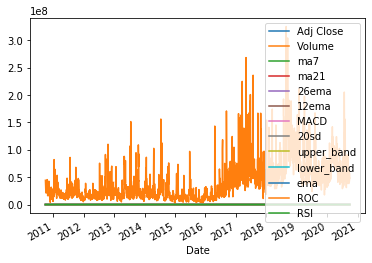

In [10]:
data_reduced.plot()
plt.legend()
plt.show()

In [11]:
df = data_reduced
df = (df - df.min())/(df.max()-df.min())
df.describe()

,Adj Close,Volume,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,ROC,RSI
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,0.127538,0.125252,0.132149,0.134387,0.138372,0.133167,0.270942,0.061075,0.135956,0.129734,0.136138,0.428904,0.567064
std,0.175206,0.110132,0.182144,0.184918,0.188884,0.183394,0.079985,0.097164,0.187029,0.176293,0.186573,0.121121,0.163924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.022416,0.046974,0.022669,0.022251,0.023448,0.022373,0.242487,0.012029,0.023134,0.023275,0.022902,0.358408,0.453229
50%,0.058966,0.089964,0.061274,0.062185,0.064089,0.061598,0.255372,0.026782,0.062313,0.061115,0.063054,0.425106,0.575730
75%,0.134607,0.167395,0.140209,0.142225,0.145205,0.140527,0.277345,0.064560,0.140998,0.141103,0.142824,0.497812,0.681100
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:

from fractions import Fraction

steps=30
training_fraction=Fraction(7, 10)
validation_fraction=Fraction(2, 10)
test_fraction=Fraction(1, 10)
training_length = int(len(data_reduced)*training_fraction)

assert (training_fraction + validation_fraction + test_fraction) == 1.0

validation_start_index = int(len(data_reduced)*training_fraction)
test_start_index = int(len(data_reduced)*(training_fraction+validation_fraction))

print(validation_start_index)
train_df, val_df, test_df = fh.define_data_group(df, validation_start_index, test_start_index)

1761


In [84]:
x_train, y_train = fh.split_data_for_steps(train_df, steps)
x_val, y_val = fh.split_data_for_steps(val_df, steps)
x_test, y_test = fh.split_data_for_steps(test_df, steps)
print(len(y_train))
print(len(y_test))
print(len(x_test))
assert len(y_train) == len(x_train)
assert len(y_test) == len(x_test)

1731
222
222


In [85]:
model = RandomForestRegressor(n_estimators=10, random_state=84, max_features="log2", verbose=2)
model = model.fit(x_train, y_train)
print("RandomForestRegressor score : ", model.score(x_val, y_val))
importances = model.feature_importances_
importances

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
RandomForestRegressor score :  -1.5283286587882623


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


array([0.01456269, 0.19449689, 0.05300855, 0.13848934, 0.07729562,
       0.03392125, 0.04949913, 0.12467072, 0.09202995, 0.20760584,
       0.0050057 , 0.00941433])

In [86]:
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
    ("lin_reg",LinearRegression())
])

In [87]:
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
    ("standard_scaler", StandardScaler()),
    ("ridge_reg",Ridge(alpha=1, solver="sag"))
])

In [88]:
#model = KernelRidge(alpha=0.000005)

#score 0.506118250434066 for AMD and steps =5
#model = KernelRidge(alpha=60, degree=4, kernel="poly", coef0=12)

#score 0.5054829362386901 for AMD and steps =5
#model = KernelRidge(alpha=2.0, degree=3, kernel="poly", coef0=10)

#score 0.5145703723256787 for AMD and steps =5
#model = KernelRidge(alpha=0.3, degree=2, kernel="poly", coef0=10)

#score 0.5145703723256787 for AMD and steps =10
model = KernelRidge(alpha=0.1, degree=2, kernel="poly", coef0=9)

In [89]:
model = KNeighborsRegressor(15)

In [90]:
model = DecisionTreeRegressor(max_leaf_nodes=16, splitter="random")

In [91]:
from sklearn.tree import export_graphviz
#from graphviz import dot
import os

model = model.fit(x_train, y_train)
print(model.score(x_val, y_val))

export_graphviz(
    model,
    out_file="gds.dot",
    feature_names=data_reduced.columns[1:],
    #class_names=data_reduced.target_names,
    rounded=True,
    filled=True    
) 

#graphviz.dot -Tpng gds.dot -o gds.png

from subprocess import check_call
check_call(['dot','-Tpng','gds.dot','-o','gds.png'])

-1.2922194923062582


0

In [81]:
model = model.fit(x_train, y_train)
model.score(x_val, y_val)

-1.1943502274803781

In [92]:
offset=10
periods=len(x_test)-offset

y_pred=[]
for i in range(periods):
    x_arr = x_test[offset+i,:]
    x_formatted = x_arr.astype('float32')
    x_formatted = np.reshape(x_formatted,(1, x_formatted.shape[0]))
    #print("x_formatted {}".format(x_formatted))
    result = model.predict(x_formatted)
    #print(result)
    y_pred = np.append(y_pred, result)

In [93]:
y_test_period = y_test[offset:offset+periods]

No handles with labels found to put in legend.


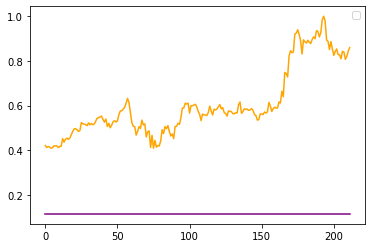

In [94]:
plt.plot(y_pred, color='purple')
plt.plot(y_test_period, color='orange')
plt.legend()
plt.show()

In [95]:
test_score = mean_squared_error(y_pred, y_test_period)
print('Test MSE: %.3f' % test_score)

Test MSE: 0.263


In [96]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test_period))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.513
